# Get subpolar gyre mean for each ensemble member

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import matplotlib as mpl
import pandas as pd
import datetime
from mpl_toolkits.axes_grid1 import make_axes_locatable
import cartopy.crs as ccrs
import cartopy
import os
import glob
import xarray as xr
from get_subpolar_gyre_functions import *

%load_ext autoreload
%autoreload 2

jtplot.style(context='paper', fscale=1.4, spines=True, grid=False, ticks=True,gridlines='--')

fontsize=16
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

mpl.rcParams['font.size'] = 16
mpl.rcParams['legend.fontsize'] = 'large'
mpl.rcParams['figure.titlesize'] = 'medium'
mpl.rcParams['axes.labelsize']= 'x-large'
mpl.rcParams['figure.facecolor']='white'

mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = ['Arial']
hfont = {'fontname':'Arial'}

mpl.rcParams['text.latex.preamble']= r'\usepackage{amsmath}'
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e','#e6ab02','#a6761d','#666666']) 

In [2]:
# Region
latitude_maximum = 61
latitude_minimum = 46
longitude_maximum = 360-20
longitude_minimum = 360-55

set_boundaries(
    longitude_maximum = longitude_maximum,
    longitude_minimum = longitude_minimum,
    latitude_maximum = latitude_maximum,
    latitude_minimum = latitude_minimum
)

# these seem to be the three latitude/longitude keys
lat_keys = ['lat', 'latitude', 'nav_lat']
lon_keys = ['lon', 'longitude', 'nav_lon']

set_lon_lat_keys(
    longitudes=lon_keys,
    latitudes =lat_keys
)


get_values()

lon_min: 305
lon_max: 340
lat_min: 46
lat_max: 61
lon_keys: ['lon', 'longitude', 'nav_lon']
lat_keys: ['lat', 'latitude', 'nav_lat']


In [3]:
paths_all_models = get_paths_dict()

Several paths provided for model 'UKESM1-0-LL' and ensemble member 'r1i1p1f2'!
[['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190406/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc', '/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190406/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'], ['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190627/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc', '/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190627/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc']]


IMPORTANT: 
**UKESM1-0-LL** has two different versions for the ensemble member **'r1i1p1f2'** indicated by 'v20190406' and 'v20190627' respectively.
We must ask Matthew which one he uses.

# Check that this approach in general works for each model

In [4]:
amoc_index = xr.open_dataarray("CMIP6_amoc_index.nc")
amoc_index = time_to_year_month(amoc_index)

In [5]:
# Test with one ensemble member per model
for model, emembers in paths_all_models.items():
    print('------------------------------------------')
    print(model)
    print_info = True
    emember = list(emembers.keys())[0]
    # the models were only f2 or f3 are available still have the "f1" coordinates in the amoc_index file
    emember_in_amoc_index = emember[:-1]+"1" 

    spg = get_subpolar_gyre(
        model   = model,
        emember =  emember, 
        print_info = print_info, 
        paths_all_models = paths_all_models)
    
    if not spg is None:
        print_info = False
        amoc_index.loc[dict(models=model, ensemble_members=emember_in_amoc_index)] = spg

------------------------------------------
CNRM-CM6-1-HR
   + Longitude: lon
   + Latitude:  lat
   The mean is taken over the dimensions  ['y', 'x']
  Ensemble-members added:
    - r1i1p1f2
------------------------------------------
CNRM-CM6-1
   + Longitude: lon
   + Latitude:  lat
   The mean is taken over the dimensions  ['y', 'x']
  Ensemble-members added:
    - r3i1p1f2
------------------------------------------
CNRM-ESM2-1
   + Longitude: lon
   + Latitude:  lat
   The mean is taken over the dimensions  ['y', 'x']
  Ensemble-members added:
    - r3i1p1f2
------------------------------------------
BCC-ESM1
CAUTION: There exist the keys: ['lon', 'longitude']. The first one is used!
CAUTION: There exist the keys: ['lat', 'latitude']. The first one is used!
   + Longitude: lon
   + Latitude:  lat
   The mean is taken over the dimensions  ['lat', 'lon']
  Ensemble-members added:
    - r2i1p1f1
------------------------------------------
BCC-CSM2-MR
CAUTION: There exist the keys: ['lon

/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


   + Longitude: lon
   + Latitude:  lat
   The mean is taken over the dimensions  ['nlat', 'nlon']
  Ensemble-members added:
    - r2i1p1f1
------------------------------------------
CESM2


/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


   + Longitude: lon
   + Latitude:  lat
   The mean is taken over the dimensions  ['nlat', 'nlon']
  Ensemble-members added:
    - r2i1p1f1
------------------------------------------
SAM0-UNICON
   + Longitude: longitude
   + Latitude:  latitude
   The mean is taken over the dimensions  ['j', 'i']
  Ensemble-members added:
    - r1i1p1f1
------------------------------------------
UKESM1-0-LL
   + Longitude: longitude
   + Latitude:  latitude
   The mean is taken over the dimensions  ['j', 'i']
  Ensemble-members added:
    - r3i1p1f2
------------------------------------------
HadGEM3-GC31-LL
   + Longitude: longitude
   + Latitude:  latitude
   The mean is taken over the dimensions  ['j', 'i']
  Ensemble-members added:
    - r2i1p1f3
------------------------------------------
HadGEM3-GC31-MM
   + Longitude: longitude
   + Latitude:  latitude
   The mean is taken over the dimensions  ['j', 'i']
  Ensemble-members added:
    - r2i1p1f3
------------------------------------------
GFDL-CM4


# Problem: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
Given the following results, I think this is a warning we can ignore happily.

## CESM2-WACCM

Several paths provided for model 'UKESM1-0-LL' and ensemble member 'r1i1p1f2'!
[['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190406/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc', '/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190406/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'], ['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190627/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc', '/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190627/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc']]


/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


    - r2i1p1f1


/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


- In the subpolar gyre mean there are 0 NaNs.
- In the global data there are 72832320 NaNs.
- All NaN's occur on the same locations over all time steps, so all good.
- NaNs are simply land mass:


/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


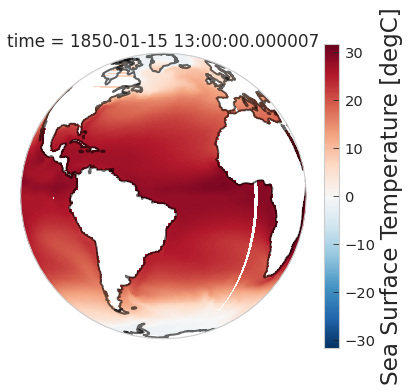

In [6]:
model = 'CESM2-WACCM'
emember = list(paths_all_models[model].keys())[0]

# Short look on the spg-result
spg = get_subpolar_gyre(model, emember, False)
# original dataset
paths = paths_all_models[model][emember][0]
data = xr.open_mfdataset(paths, concat_dim="time").tos

data_stacked = (
    data
    .stack(loc_lon_lat = ("nlon", "nlat"))
    .dropna(dim ="loc_lon_lat", how="all") # remove all locations where there is NaN's in all time steps
    .dropna(dim="time", how="any") # remove time steps where there are still any locations with NaN's left
)

print("- In the subpolar gyre mean there are " + str(np.sum(np.isnan(spg.values)))+ " NaNs.")
print("- In the global data there are " + str(np.sum(np.isnan(data.values)))+ " NaNs.")

if len(data.time.values) == len(data_stacked.time.values):
    print("- All NaN's occur on the same locations over all time steps, so all good.")
    print("- NaNs are simply land mass:")
    p = make_nice_plot(data.isel(time=0), "lon", "lat")
else:
    print("CAUTION: There are time steps with NaN's in locations where there are no NaN's in other time steps")

## CESM2

Several paths provided for model 'UKESM1-0-LL' and ensemble member 'r1i1p1f2'!
[['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190406/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc', '/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190406/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'], ['/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190627/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc', '/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Omon/tos/gn/v20190627/tos_Omon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc']]


/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


    - r2i1p1f1


/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/xarray/core/indexing.py:1226: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


- In the subpolar gyre mean there are 0 NaNs.
- In the global data there are 72832320 NaNs.
- All NaN's occur on the same locations over all time steps, so all good.
Hence, it makes sense to have a look at a random time step plot:


/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


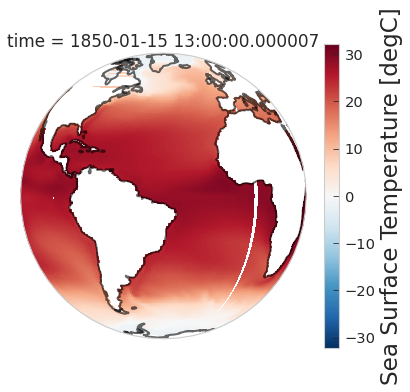

In [7]:
model = 'CESM2'
emember = list(paths_all_models[model].keys())[0]

# Short look on the spg-result
spg = get_subpolar_gyre(model, emember, False)
# original dataset
paths = paths_all_models[model][emember][0]
data = xr.open_mfdataset(paths, concat_dim="time").tos

data_stacked = (
    data
    .stack(loc_lon_lat = ("nlon", "nlat"))
    .dropna(dim ="loc_lon_lat", how="all") # remove all locations where there is NaN's in all time steps
    .dropna(dim="time", how="any") # remove time steps where there are still any locations with NaN's left
)

print("- In the subpolar gyre mean there are " + str(np.sum(np.isnan(spg.values)))+ " NaNs.")
print("- In the global data there are " + str(np.sum(np.isnan(data.values)))+ " NaNs.")

if len(data.time.values) == len(data_stacked.time.values):
    print("- All NaN's occur on the same locations over all time steps, so all good.")
    print("Hence, it makes sense to have a look at a random time step plot:")
    p = make_nice_plot(data.isel(time=0), "lon", "lat")
else:
    print("CAUTION: There are time steps with NaN's in locations where there are no NaN's in other time steps")

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


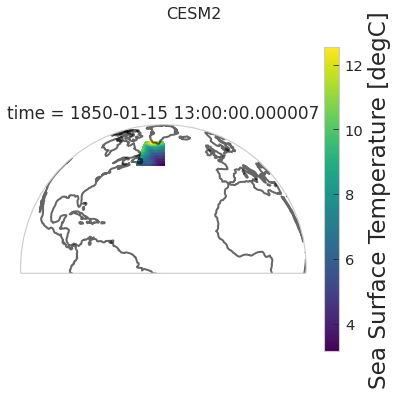

In [8]:
p = make_nice_plot_of_spg(data.isel(time=0), "nlon", "nlat", model)

# Problem: The "BCC-ESM1" and "BCC-CSM2-MR" have the coordinates longitude & latitude as well as the dimensions lon & lat
Given the following results, it seems that "longitude" and "latitude" are two-dimensional "broadcasted" representations, while "lon" and "lat" are the actual dimensions. I would have preferred using "longitude" and "latitude", as they seem more precise to me, but actually the resulting subpolar gyre time series are exactly the same anyways.

## BCC-ESM1

/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


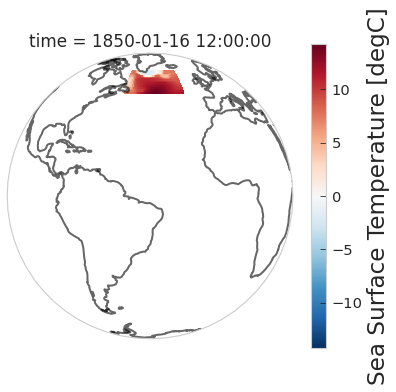

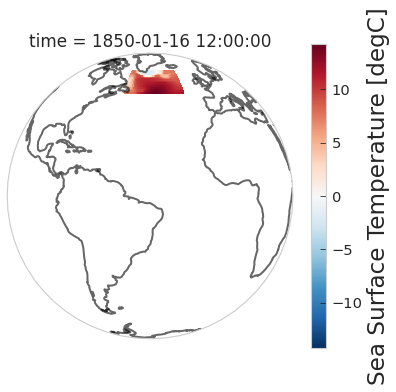

In [9]:
model = 'BCC-ESM1'
emember = list(paths_all_models[model].keys())[0]

# original dataset
paths = paths_all_models[model][emember][0]
data = xr.open_mfdataset(paths, concat_dim="time").tos

p = make_nice_plot_of_spg(data.isel(time=0), "longitude", "latitude")
p = make_nice_plot_of_spg(data.isel(time=0), "lon", "lat")

In [10]:
# Longitude values for "lon ~ 200"
data.sel(lon=200, method="nearest").longitude.values

array([-159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.5     ,
       -159.5     , -159.5     , -159.5     , -159.5     , -159.

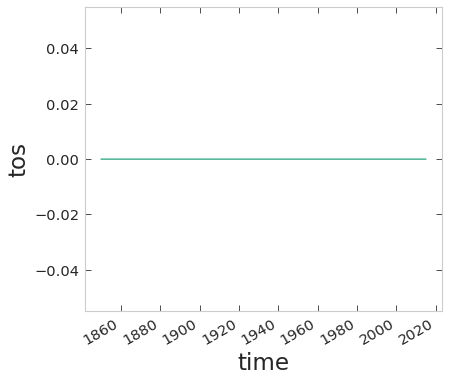

In [11]:
spg_lon = subpolargyre(data, "lon", "lat", False)
spg_longitude = subpolargyre(data, "longitude", "latitude", False)

spg_lon = time_to_year_month(spg_lon)
spg_longitude = time_to_year_month(spg_longitude)

(spg_lon-spg_longitude).plot()

## BCC-CSM2-MR

/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,


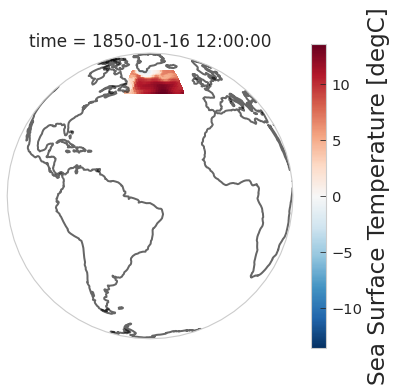

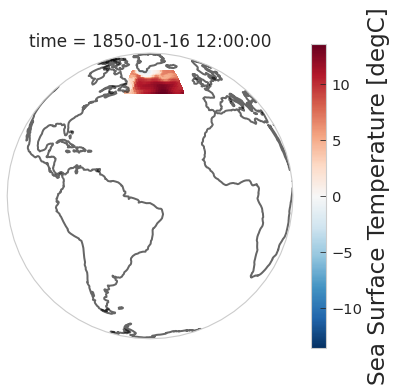

In [12]:
model = 'BCC-CSM2-MR'
emember = list(paths_all_models[model].keys())[0]

# original dataset
paths = paths_all_models[model][emember][0]
data = xr.open_mfdataset(paths, concat_dim="time").tos

p = make_nice_plot_of_spg(data.isel(time=0), "longitude", "latitude")
p = make_nice_plot_of_spg(data.isel(time=0), "lon", "lat")

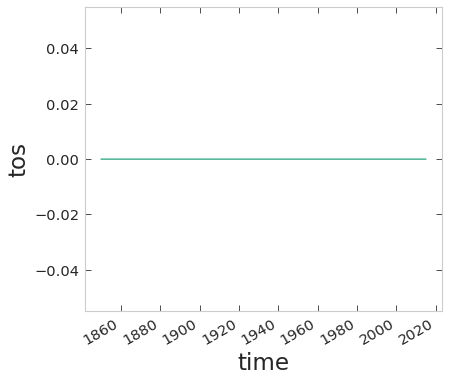

In [13]:
spg_lon = subpolargyre(data, "lon", "lat", False)
spg_longitude = subpolargyre(data, "longitude", "latitude", False)

spg_lon = time_to_year_month(spg_lon)
spg_longitude = time_to_year_month(spg_longitude)

(spg_lon-spg_longitude).plot()

# Problem: UKESM1-0-LL has two different versions for the ensemble member 'r1i1p1f2'
indicated by 'v20190406' and 'v20190627' respectively.
Which is the right one?

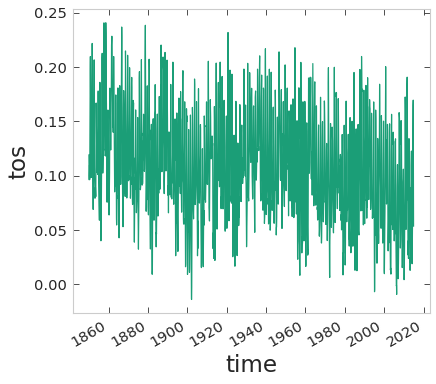

In [14]:
model = 'UKESM1-0-LL'
emember = 'r1i1p1f2'

# original dataset
paths = paths_all_models[model][emember]
data1 = xr.open_mfdataset(paths[0], concat_dim="time").tos
data2 = xr.open_mfdataset(paths[1], concat_dim="time").tos

spg1 = subpolargyre(data1, "longitude", "latitude", False)
spg2 = subpolargyre(data2, "longitude", "latitude", False)
spg1 = time_to_year_month(spg1)
spg2 = time_to_year_month(spg2)

(spg1-spg2).plot()

In [15]:
spg1 = subpolargyre(data, "longitude", "latitude", False)
if np.sum(spg_lon.values != spg_longitude.values) == 0:
    print("The time series are the same no matter which coordinate representation we use.")
else:
    print("There resulting time series are different.")

The time series are the same no matter which coordinate representation we use.


# Investigate the different areas for spg
Seems like the selection of the area worked

/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This 

CAUTION: There exist the keys: ['lon', 'longitude']. The first one is used!
CAUTION: There exist the keys: ['lat', 'latitude']. The first one is used!
CAUTION: There exist the keys: ['lon', 'longitude']. The first one is used!
CAUTION: There exist the keys: ['lat', 'latitude']. The first one is used!


/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  X, Y, C, shading = self._pcolorargs('pcolormesh', *args,
/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'tos' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(
/p/tmp/mayayami/mayaenv/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1597: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but a

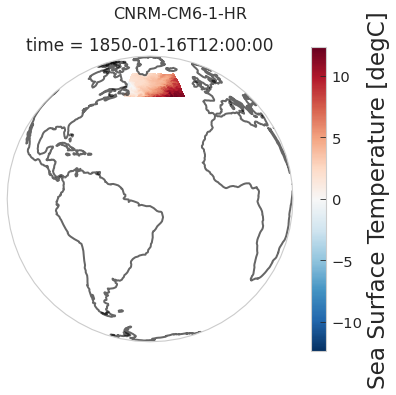

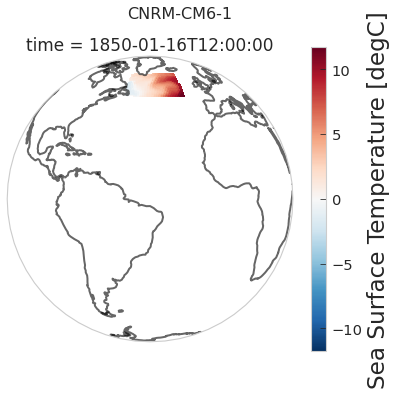

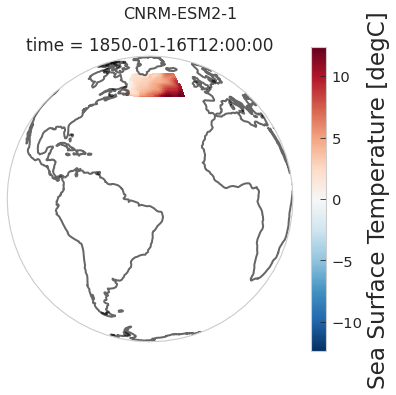

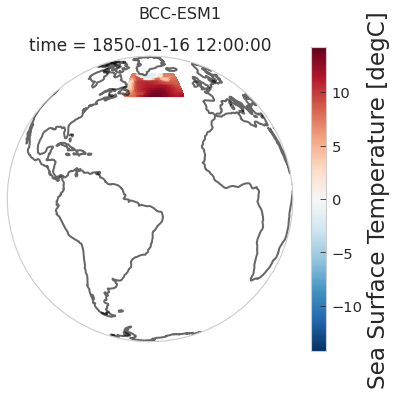

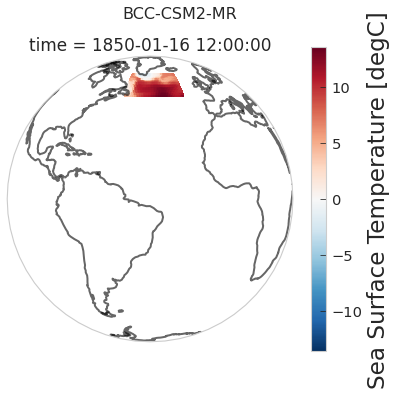

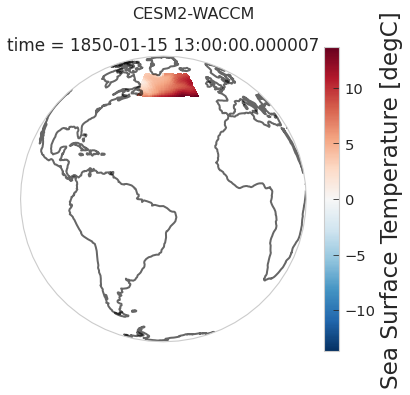

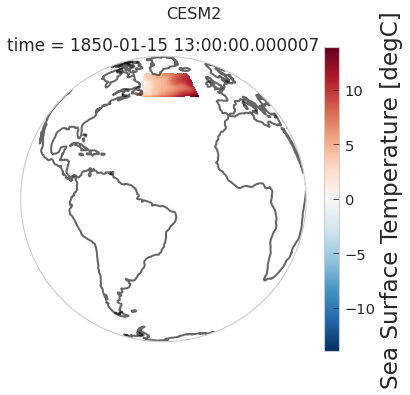

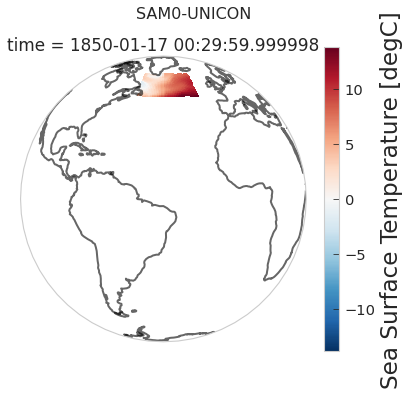

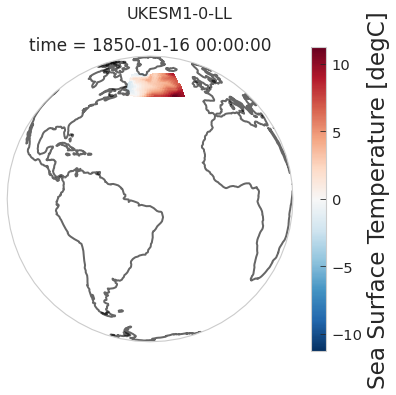

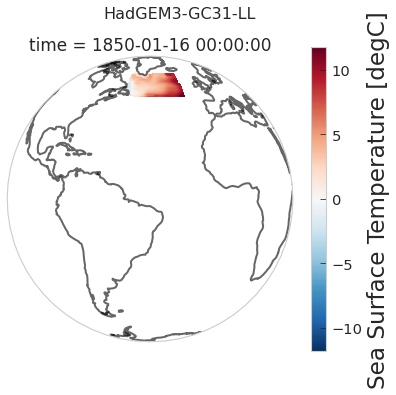

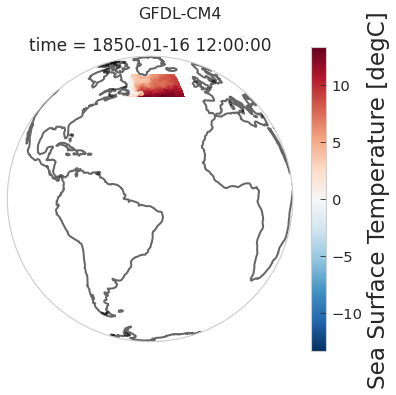

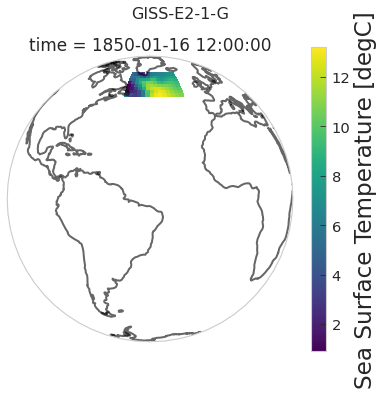

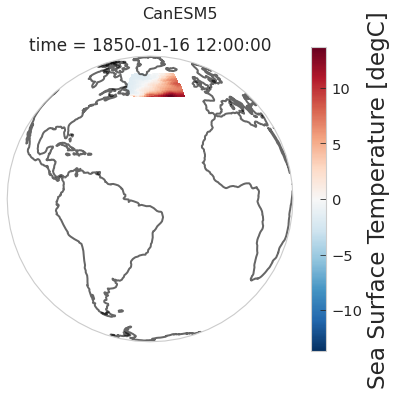

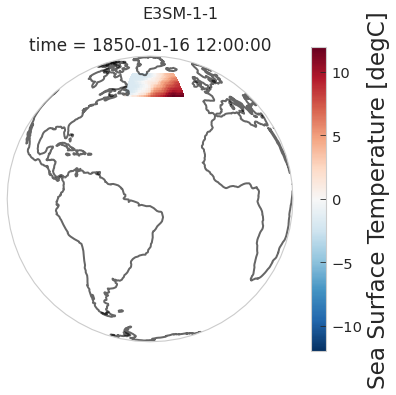

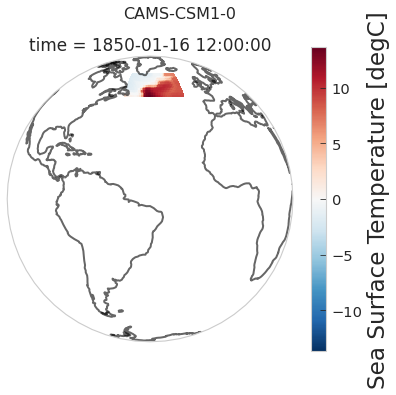

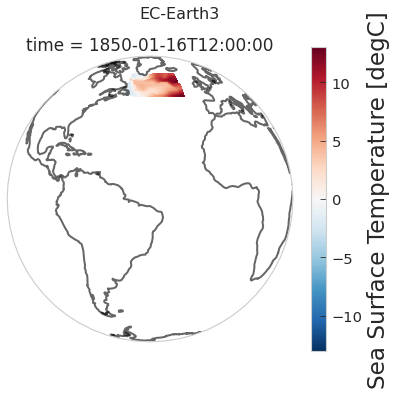

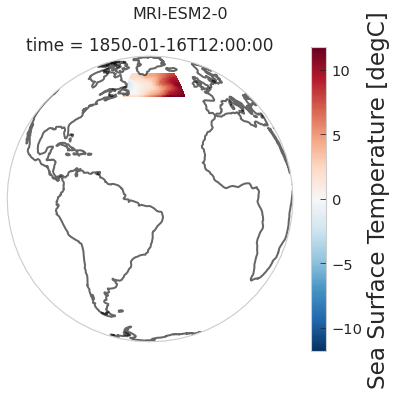

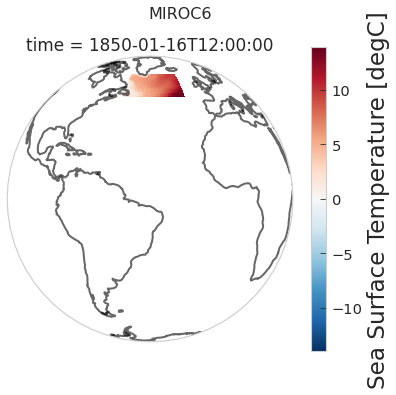

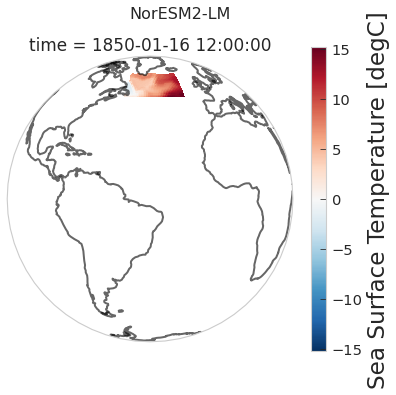

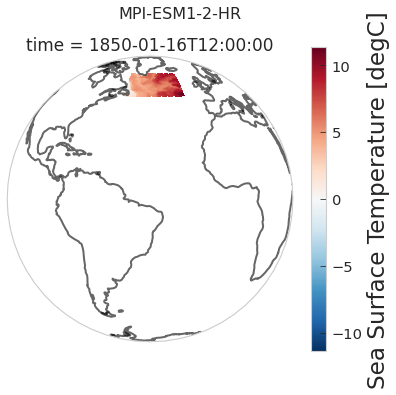

In [16]:
# Test with one ensemble member per model
for model, emembers in paths_all_models.items():
    emember = list(emembers.keys())[0]

    # original dataset
    paths = paths_all_models[model][emember]
    data = xr.open_mfdataset(paths[0], concat_dim="time").tos;

    str_lon = get_lon_lat_keys(data, lon_keys)
    str_lat = get_lon_lat_keys(data, lat_keys)

    p = make_nice_plot_of_spg(data.isel(time=0), str_lon, str_lat, model)
    p.show()


# Problem: get_subpolar_gyre_all_models.py stopped
Last output:
```
EC-Earth3-Veg
   + Longitude: longitude
   + Latitude:  latitude
   The mean is taken over the dimensions  ['j', 'i']
  Ensemble-members added:
    - r2i1p1f1
    - r5i1p1f1
    - r1i1p1f1
    - r4i1p1f1
    - r3i1p1f1
    - r10i1p1f1

```
throwing the error:

```
IndexError: dimension coordinate 'time' conflicts between indexed and indexing objects:
<xarray.DataArray 'time' (time: 456)>
array(['1852-01-01T00:00:00.000000000', '1852-02-01T00:00:00.000000000',
       '1852-03-01T00:00:00.000000000', ..., '1988-10-01T00:00:00.000000000',
       '1988-11-01T00:00:00.000000000', '1988-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1852-01-01 1852-02-01 ... 1988-12-01
vs.
<xarray.IndexVariable 'time' (time: 1980)>
array(['1850-01-01T00:00:00.000000000', '1850-02-01T00:00:00.000000000',
       '1850-03-01T00:00:00.000000000', ..., '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
```

Somehow, there are a lot of years missing in the data, see e.g. the jump from 1861 to 1892. But this ensemble member does also not occur in Matthew's data, so we should simply exclude it manually when creating the full dataset.

In [48]:
model = 'EC-Earth3-Veg'
emember = 'r10i1p1f1'

paths = paths_all_models[model][emember]
i_start = len('/p/tmp/mayayami/SYNDA/data/CMIP6/CMIP/EC-Earth-Consortium/EC-Earth3-Veg/historical/r10i1p1f1/Omon/tos/gn/v20210523/tos_Omon_EC-Earth3-Veg_historical_r10i1p1f1_gn_')
p_time = [p[i_start:-3] for p in paths[0]]
p_time.sort()

for p in p_time[27:32]:
    print(p[0:4])
print(' ')
for p in p_time[88:93]:
    print(p[0:4])

1877
1878
1879
1881
1882
 
1939
1940
1942
1943
1944
